<img src='./assets/线性回归步骤.png' width="800" />

# 房价回归预测
**单因子线性回归（size 和 Price之间的关系）**

线性回归的基本步骤是：
- 0、数据加载处理
- 1、确定回归模型
- 2、数据可视化
- 3、模型评估

## 0、数据加载处理
数据加载处理包括：数据加载与数据处理两部分内容：
- 用 **pandas** 进行数据的加载
- 用 **numpy** **reshape()**等对数据进行处理，以获得正确格式的输入数据

In [37]:
#【数据加载处理】数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('./data/usa_housing_price.csv')

In [38]:
data.head() # 打印加载的数据

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


In [46]:
size = data.loc[:, 'size'] # 读取 size
price = data.loc[:, 'Price'] # 读取 Price
size

0       188.214212
1       160.042526
2       227.273545
3       164.816630
4       161.966659
           ...    
4995    161.641403
4996    159.164596
4997    139.491785
4998    184.845371
4999    148.589423
Name: size, Length: 5000, dtype: float64

In [70]:
#【数据加载处理】数据处理
size = np.array(size).reshape(-1, 1) # numpy、reshape
size

array([[188.2142121],
       [160.0425258],
       [227.2735445],
       ...,
       [139.4917852],
       [184.845371 ],
       [148.5894227]])

## 原始数据展示

一般我们会对原始数据以及训练结果进行可视化：
- 原始数据可视化：对训练数据的分布、特征进行分析的必要手段，可以根据数据的分布、特征选择最合适的训练模型
- 结果可视化：对训练结果进行可视化，可以评估训练模型的效果，分析并确定后续优化的路径

这里我们使用的是画图神器 —— **matplotlib**

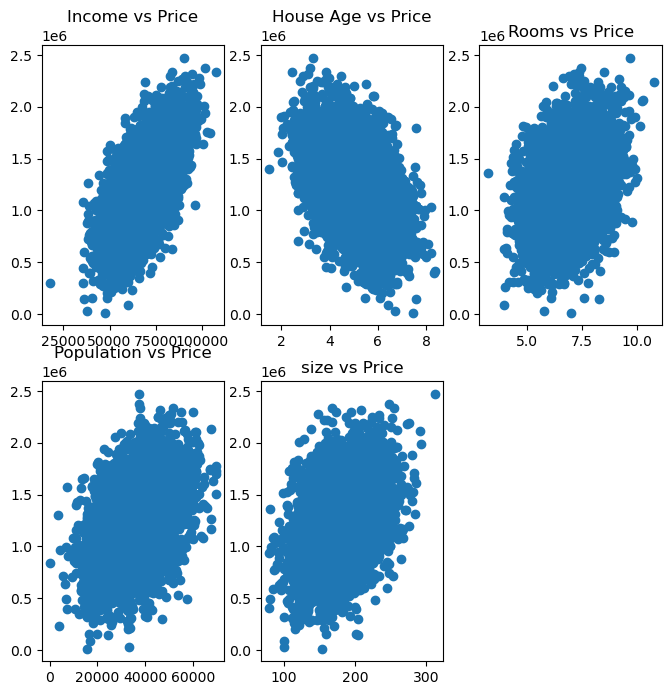

In [43]:
#【数据可视化】原始数据可视化，可先对原始数据进行分析，选用合适的模型进行训练
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))
fig1 = plt.subplot(231) # 2行3列第1个
plt.title('Income vs Price')
plt.scatter(data.loc[:, 'Avg. Area Income'], data.loc[:, 'Price'])

fig2 = plt.subplot(232) # 2行3列第2个
plt.title('House Age vs Price')
plt.scatter(data.loc[:, 'Avg. Area House Age'], data.loc[:, 'Price'])

fig3 = plt.subplot(233) # 2行3列第3个
plt.title('Rooms vs Price')
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], data.loc[:, 'Price'])

fig4 = plt.subplot(234) # 2行3列第4个
plt.title('Population vs Price')
plt.scatter(data.loc[:, 'Area Population'], data.loc[:, 'Price'])

fig5 = plt.subplot(235) # 2行3列第5个
plt.title('size vs Price')
plt.scatter(data.loc[:, 'size'], data.loc[:, 'Price'])


## 1、确定回归模型
本实战项目使用的是线性回归模型，在这里我们采用**sklearn**这个工具库中线性回归模型**LinearRegression**

In [49]:
#【确定回归模型】
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(size, price)
price_predict = LR1.predict(size)
print(price_predict)

[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


## 2、数据可视化

一般我们会对原始数据以及训练结果进行可视化：
- 原始数据可视化：对训练数据的分布、特征进行分析的必要手段，可以根据数据的分布、特征选择最合适的训练模型
- 结果可视化：对训练结果进行可视化，可以评估训练模型的效果，分析并确定后续优化的路径

这里我们使用的是画图神器 —— **matplotlib**

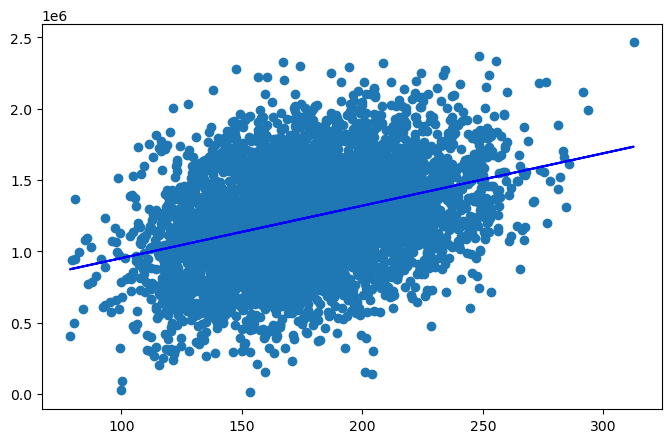

In [51]:
# 【数据可视化】结果可视化
fig6 = plt.figure(figsize=(8, 5))
plt.scatter(size, price)
plt.plot(size, price_predict, 'b')
plt.show()

## 3、模型评估
线性回归一般用的模型评估方法是：均方误差和R2方值法，对应**sklearn**中的**mean_squared_error**，**r2_score**

(真的是方便到，拎包入住，开袋即食啊...）

In [50]:
#【模型评估】
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(price, price_predict)
R2 = r2_score(price, price_predict)
print(MSE, R2)

108771672553.6264 0.1275031240418234


# 多因子线性回归
原理一模一样，唯一区别就是：
- 输入数据的处理（从一列变成多列）
- 结果可视化展示（无法展示维度过高的图像）

## 0、数据加载处理
数据加载处理包括：数据加载与数据处理两部分内容：
- 用 **pandas** 进行数据的加载
- 用 **numpy** **reshape()**等对数据进行处理，以获得正确格式的输入数据

In [53]:
# 数据加载处理
x_multi = data.drop(['Price'], axis=1) # 去掉最后一行
print(x_multi)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.317139                   7.009188   
1          79248.64245             4.997100                   6.730821   
2          61287.06718             5.134110                   8.512727   
3          63345.24005             3.811764                   5.586729   
4          59982.19723             5.959445                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             3.169638                   6.137356   
4996       78491.27543             4.000865                   6.576763   
4997       63390.68689             3.749409                   4.805081   
4998       68001.33124             5.465612                   7.130144   
4999       65510.58180             5.007695                   6.792336   

      Area Population        size  
0         23086.80050  188.214212  
1         40173.07217  160.042526  
2  

## 1、确定回归模型
本实战项目使用的是线性回归模型，在这里我们采用**sklearn**这个工具库中线性回归模型**LinearRegression**

In [54]:
# 建立回归模型
LR_multi = LinearRegression()
LR_multi.fit(x_multi, price)
price_multi_predict = LR_multi.predict(x_multi)
print(price_multi_predict)

[1223968.89166086 1497306.3318863  1250884.31019437 ... 1020693.92390376
 1260503.36914585 1302737.7915763 ]


## 2、数据可视化

一般我们会对原始数据以及训练结果进行可视化：
- 原始数据可视化：对训练数据的分布、特征进行分析的必要手段，可以根据数据的分布、特征选择最合适的训练模型
- 结果可视化：对训练结果进行可视化，可以评估训练模型的效果，分析并确定后续优化的路径

这里我们使用的是画图神器 —— **matplotlib**

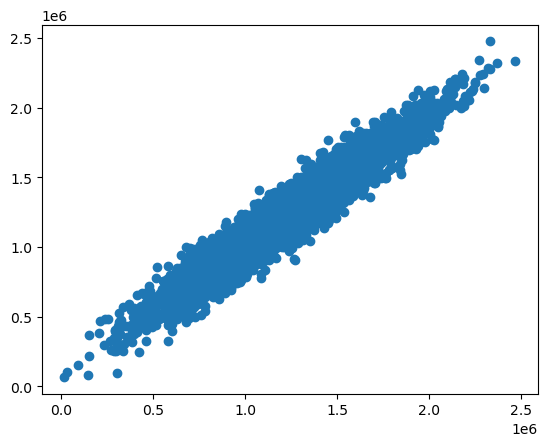

In [58]:
# 结果可视化
plt.figure()
plt.scatter(price, price_multi_predict)
plt.show()

## 3、模型评估
线性回归一般用的模型评估方法是：均方误差和R2方值法，对应**sklearn**中的**mean_squared_error**，**r2_score**

(真的是方便到，拎包入住，开袋即食啊...）

In [69]:
# 模型评估
MSE_multi = mean_squared_error(price, price_multi_predict)
R2_multi = r2_score(price, price_multi_predict)
print(MSE_multi, R2_multi)

10219846512.17786 0.9180229195220739
